# Structures -> StreamData
Для хранения датасета был написан класс `StreamData`, содержащий в себе `i:int`, `j:int` и `dataset:pd.DataFrame`
Dataframe из библиотеки Pandas - удобное средство для хранения данных.

In [1]:
import structures
from structures import StreamData 
# Можно брать класс StreamData напрямую, чтобы
# каждый раз не писать structures.StreamData

Попробуем протестировать наш класс. Для этого вначале конвертируем сырые `.plt` - данные в StreamData, используя `structures.parse_plt`

In [2]:
data = structures.parse_plt("2D_example_experiment.plt") # Файл 2D_ex...plt заранее закинуть в одну папку со скриптом
print(data.i, data. j)
print(data.dataset)

20 7
        x         y      Vx/U      Vy/U    k/U**2      Vm/U   x-m       y-m  \
0    0.10  0.008724 -0.005882 -0.030244  0.014873  0.030811 -0.14  0.001745   
1    0.10  0.051499 -0.129412  0.180595  0.048256  0.222176 -0.14  0.010300   
2    0.10  0.137447  0.594118  0.283301  0.230549  0.658206 -0.14  0.027489   
3    0.10  0.160039  0.673529 -0.031545  0.018038  0.674268 -0.14  0.032008   
4    0.10  0.209299  0.744118  0.127514  0.179967  0.754964 -0.14  0.041860   
..    ...       ...       ...       ...       ...       ...   ...       ...   
135  0.85  0.876580 -0.102941  0.438935  0.082962  0.450845 -0.44  0.175316   
136  0.85  0.913436 -0.085294  0.306966  0.077203  0.318595 -0.44  0.182687   
137  0.85  0.939252 -0.041176  0.238150  0.050853  0.241683 -0.44  0.187850   
138  0.85  0.967831 -0.014706  0.123373  0.048871  0.124247 -0.44  0.193566   
139  0.85  0.993689  0.020588 -0.002913  0.000000  0.020793 -0.44  0.198738   

           Vx        Vy         k        Vm  


Пока мы осредняем величину `Vx/U`, воспользуемся функцией `advance_to_vxu()`, преобразующей данные в необходимый нам двухмерный массив

In [3]:
from pprint import pprint

array = structures.advance_to_vxu(data)
pprint(array, compact=True, width=100)

[[-0.005882353, -0.12941177, 0.59411764, 0.6735294, 0.7441176, 0.4, 0.1],
 [-0.023529412, -0.05882353, -0.18235295, -0.23529412, -0.24411765, -0.2529412, -0.2529412],
 [-0.21764706, -0.1382353, -0.120588236, -0.08529412, -0.05882353, -0.005882353, 0.00877193],
 [0.47368422, 0.7105263, 0.6052632, 0.49122807, 0.39473686, 0.2982456, 0.2982456],
 [0.0, -0.10526316, -0.23684211, -0.22807017, 0.04385965, 0.02631579, 0.01754386],
 [0.01754386, 0.00877193, -0.01754386, -0.00877193, 0.0, 0.047058824, 0.44411764],
 [0.5852941, 0.5147059, 0.4882353, 0.44411764, 0.41764706, 0.35588235, 0.064705886],
 [-0.1382353, -0.23529412, -0.2, -0.20882353, -0.2, -0.16470589, -0.10294118],
 [-0.06764706, -0.032352943, 0.011764706, 0.011764706, 0.052556746, 0.28025517, 0.41984534],
 [0.42842308, 0.4367677, 0.46271068, 0.44465393, 0.37385657, 0.09227538, -0.040189996],
 [-0.17234458, -0.19046348, -0.28723493, -0.18246847, -0.2443618, -0.25330472, -0.1571393],
 [0.009310674, 0.01782625, 0.008828953, 0.050220124, 

К этим данным (`array`) уже можно применять методы осреднения:

In [4]:
from averager import line_2_row_averaging_this
from averager import diagonally_averaging_this

av1 = line_2_row_averaging_this(array.copy(), 1)
pprint(av1, compact=True, width=100) # <-- Выглядит, как будто осреднилось

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
[[-0.05441176625000001, 0.03235293749999999, 0.11029411166666665, 0.22499998666666665,
  0.18088233833333334, 0.08235292500000002, -0.0014705999999999816],
 [-0.0955882375, -0.03137255233333334, 0.03529411266666666, 0.12058822599999999,
  0.10392155855555556,

In [5]:
av2 = diagonally_averaging_this(array.copy(), 1) # <-- Ошибка
pprint(av2, compact=True, width=100)

[[-0.05441176625000001, 0.03235293749999999, 0.11029411166666665, 0.22499998666666665,
  0.18088233833333334, 0.08235292500000002, -0.0014705999999999816],
 [-0.0955882375, -0.03137255233333334, 0.03529411266666666, 0.12058822599999999,
  0.10392155855555556, 0.04868706633333334, 0.11371975666666666],
 [0.12432920300000001, 0.11647747022222221, 0.1096032571111111, 0.062750836, 0.033539728555555565,
  0.09548217111111112, 0.08726637],
 [0.12051083333333334, 0.10787753933333333, 0.09919160822222223, 0.08949662377777778,
  0.11598441222222222, 0.10029239777777778, 0.07942896444444446],
 [0.184210525, 0.16179337555555556, 0.13547758555555556, 0.09736842188888889, 0.11828918822222224,
  0.1220043571111111, 0.07582272488888889],
 [0.17017543833333335, 0.1394335511111111, 0.020588228555555563, 0.11366815633333333,
  0.17445820266666667, 0.15745900666666668, 0.09575163222222222],
 [0.12546439499999998, -0.0004988038333333221, 0.015583062833333342, 0.10720673783333333,
  0.18858788566666665, 0.

Наконец, можем узреть результаты работы первого метода!

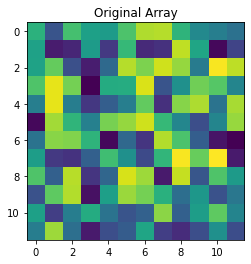

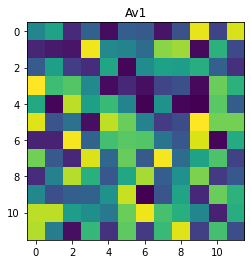

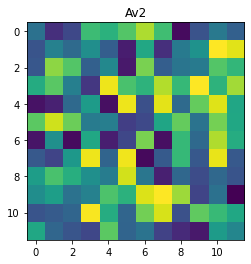

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def heatmap(data, title: str):
    arr = np.random.random(( 12 , 12 )) # np.array(data)
    # plt.imshow(arr, cmap='autumn', interpolation='nearest')
    plt.imshow(arr)
    plt.title(title)

    plt.show()

heatmap(array, "Original Array")
heatmap(av1, "Av1")
heatmap(av2, "Av2")